In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = '/content/drive/MyDrive/bank-full.csv'
df = pd.read_csv(file_path, delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df = df.rename(columns={'y': 'deposit'})
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [6]:
# Create a new DataFrame without the 'housing' and 'loan' columns
df1 = df.drop(columns=['housing', 'loan'])

In [7]:
df1

,age,job,marital,education,default,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,telephone,17,nov,508,4,-1,0,unknown,no


In [8]:
df1.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   contact    45211 non-null  object
 7   day        45211 non-null  int64 
 8   month      45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  deposit    45211 non-null  object
dtypes: int64(7), object(8)
memory usage: 5.2+ MB


In [10]:
df1['deposit'].value_counts()

deposit
no     39922
yes     5289
Name: count, dtype: int64

In [11]:
# Undersample the "no" values to 15000
df_no_undersampled = df1[df1['deposit'] == 'no'].sample(n=17000, replace=False, random_state=42)

# Oversample the "yes" values to 15000
df_yes_oversampled = df1[df1['deposit'] == 'yes'].sample(n=17000, replace=True, random_state=42)

# Concatenate the undersampled "no" values and oversampled "yes" values
df_balanced = pd.concat([df_no_undersampled, df_yes_oversampled])

# Shuffle the dataframe
df2 = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the value counts to verify the balance
print(df2['deposit'].value_counts())



deposit
yes    17000
no     17000
Name: count, dtype: int64


In [12]:
df2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'contact',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'deposit'],
      dtype='object')

In [13]:
df2['marital'].value_counts()

marital
married     19228
single      10799
divorced     3973
Name: count, dtype: int64

In [14]:
df2[df2['balance']==df2.balance.max()]

,age,job,marital,education,default,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
9587,51,management,single,tertiary,no,102127,cellular,3,jun,90,1,-1,0,unknown,no


In [15]:
df2[df2['balance']==df2.balance.min()]


,age,job,marital,education,default,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
14489,26,blue-collar,single,secondary,yes,-8019,cellular,7,jul,299,3,-1,0,unknown,no


In [16]:
df2=df2[df2.balance>0]

<ipython-input-17-fd2cfcfd4d07>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='job', y='balance', data=df2, ci=None)


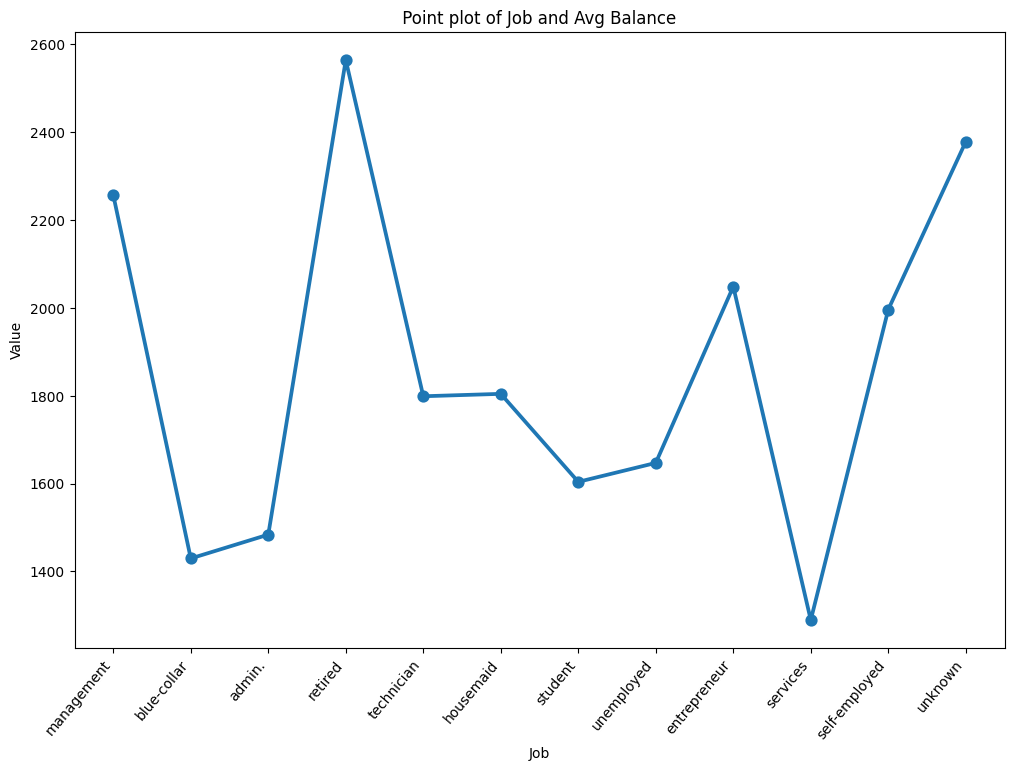

In [17]:
plt.figure(figsize=(12, 8))
sns.pointplot(x='job', y='balance', data=df2, ci=None)
plt.title(' Point plot of Job and Avg Balance ')
plt.xlabel('Job')
plt.ylabel('Value')

plt.xticks(rotation=50, ha='right')

plt.show()

<ipython-input-18-30a482faf285>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='deposit', data=df2, palette='Set1')


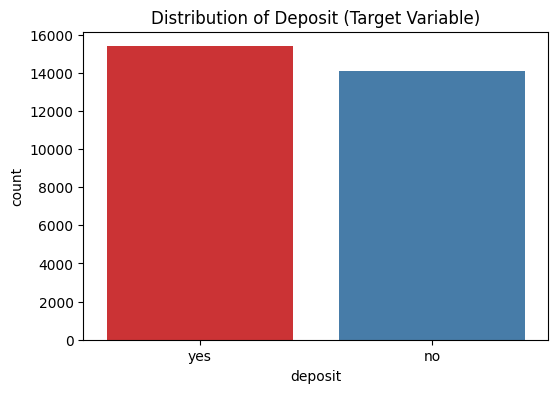

In [18]:
# Distribution of the target variable 'deposit'
plt.figure(figsize=(6, 4))
sns.countplot(x='deposit', data=df2, palette='Set1')
plt.title('Distribution of Deposit (Target Variable)')
plt.show()

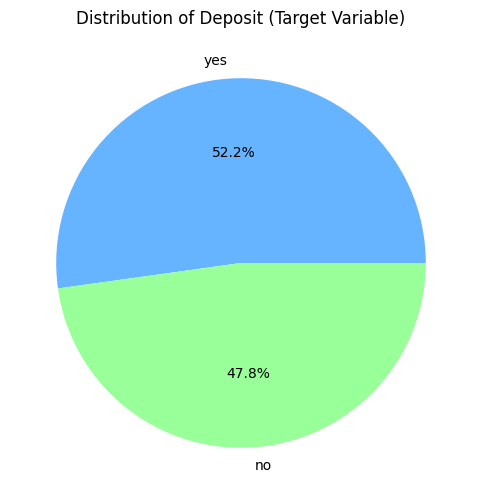

In [19]:
plt.figure(figsize=(6, 6))
deposit_counts = df2['deposit'].value_counts()
plt.pie(deposit_counts, labels=deposit_counts.index, autopct='%1.1f%%', colors=['#66b3ff', '#99ff99'])
plt.title('Distribution of Deposit (Target Variable)')
plt.show()

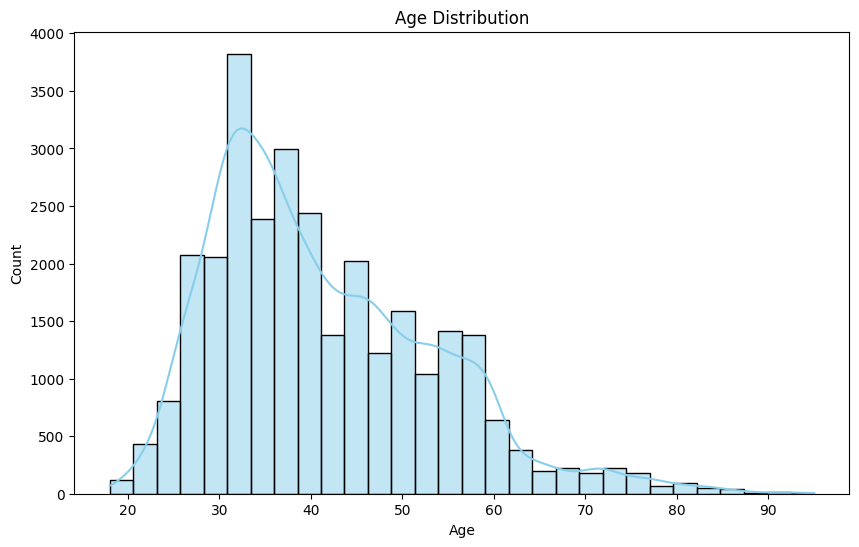

In [21]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(x='age', data=df2, bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<ipython-input-22-acabb3a35fa6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='job', data=df2, palette='viridis')


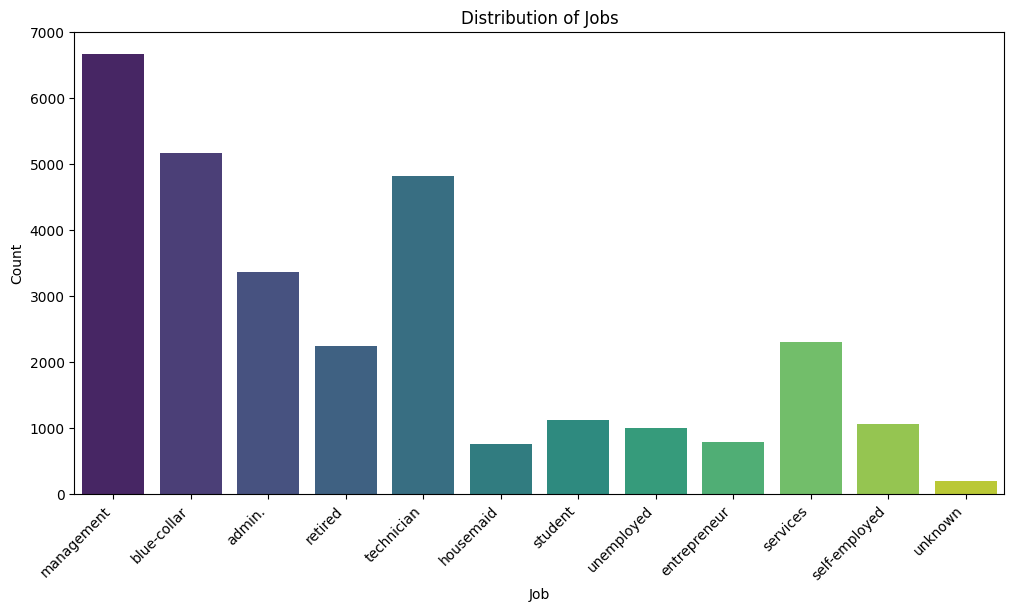

In [22]:
# Job distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='job', data=df2, palette='viridis')
plt.title('Distribution of Jobs')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-23-6dc84c87d086>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='marital', data=df2, palette='pastel')


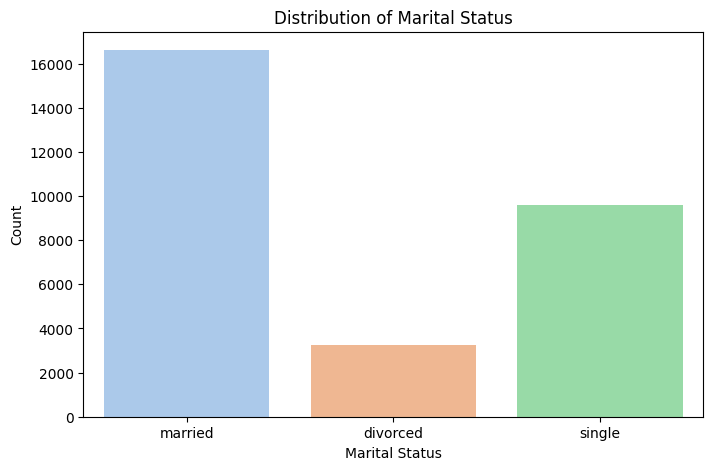

In [23]:
# Marital status distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='marital', data=df2, palette='pastel')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

<ipython-input-24-3c0ed9b70d96>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='education', data=df2, palette='muted')


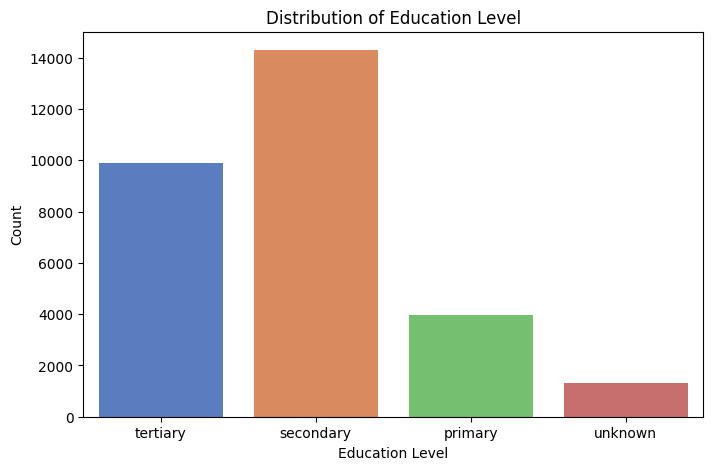

In [24]:
# Education level distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='education', data=df2, palette='muted')
plt.title('Distribution of Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

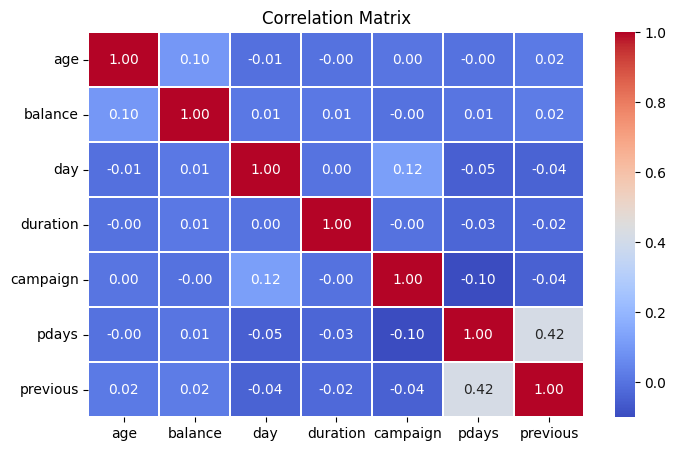

In [27]:
# Select only numeric columns
numeric_df = df2.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.2)
plt.title('Correlation Matrix')
plt.show()


In [28]:
# Correlation Matrix
#correlation_matrix = df2.corr()
#plt.figure(figsize=(8, 5))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.2)
#plt.title('Correlation Matrix')
#plt.show()

In [29]:
df2.head()

,age,job,marital,education,default,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,34,management,married,tertiary,no,8000,cellular,12,feb,291,1,260,2,failure,yes
2,32,blue-collar,married,secondary,no,119,cellular,4,may,20,5,-1,0,unknown,no
3,37,admin.,married,secondary,no,96,cellular,7,aug,155,1,99,2,success,yes
5,35,blue-collar,divorced,primary,no,1077,cellular,12,may,25,6,-1,0,unknown,no
6,33,admin.,single,tertiary,no,2,cellular,29,jan,132,2,-1,0,unknown,no


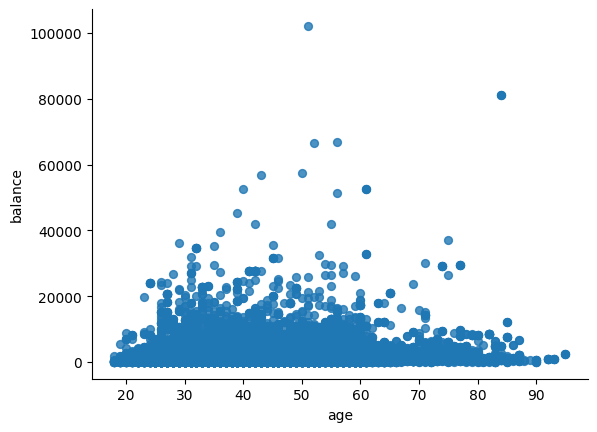

In [30]:

from matplotlib import pyplot as plt
df2.plot(kind='scatter', x='age', y='balance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-34-d9cec0781d7f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='deposit', y='job', data=df2, palette='viridis', orient='h')


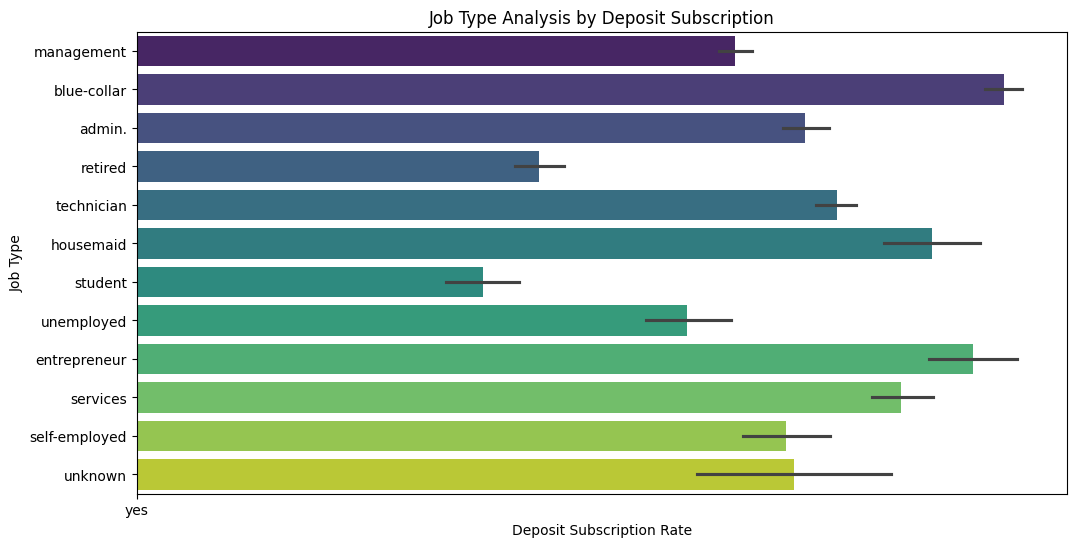

In [34]:
# Job Type Analysis
plt.figure(figsize=(12, 6))
sns.barplot(x='deposit', y='job', data=df2, palette='viridis', orient='h')
plt.title('Job Type Analysis by Deposit Subscription')
plt.xlabel('Deposit Subscription Rate')
plt.ylabel('Job Type')
plt.show()


<ipython-input-35-637d5c3ce5c2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='education', y='deposit', data=df2, palette='muted')


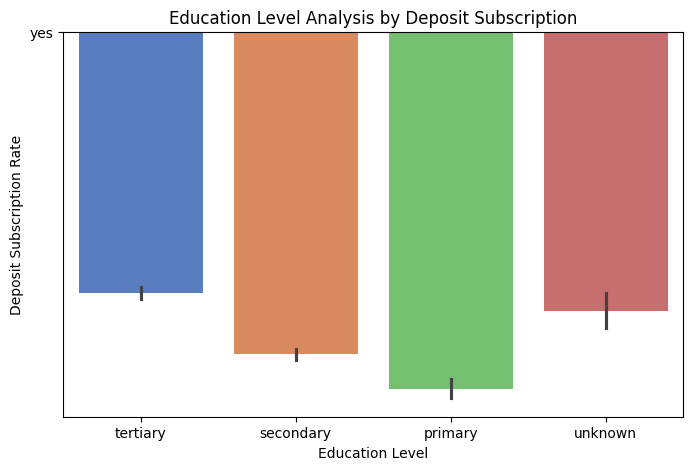

In [35]:
# Education Level
plt.figure(figsize=(8, 5))
sns.barplot(x='education', y='deposit', data=df2, palette='muted')
plt.title('Education Level Analysis by Deposit Subscription')
plt.xlabel('Education Level')
plt.ylabel('Deposit Subscription Rate')
plt.show()

In [36]:
!pip install plotly


In [37]:
import pandas as pd
import plotly.express as px

job_balance_mean = df2.groupby('job')['balance'].mean().reset_index()

job_balance_mean = job_balance_mean.sort_values(by='balance', ascending=False)

fig = px.treemap(job_balance_mean,
                 path=['job'],
                 values='balance',
                 title='Average Balance',
                 color='balance',
                 color_continuous_scale='Viridis',
                 width=800,
                 height=500)

fig.show()


### LABEL ENCODING

In [47]:
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder
le = LabelEncoder()
df2.marital = le.fit_transform(df2.marital)
df2.deposit = le.fit_transform(df2.deposit)
df2.default = le.fit_transform(df2.default)

In [49]:
df2.head()

,age,job,marital,education,default,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,34,management,1,tertiary,0,8000,cellular,12,3,291,1,260,2,failure,1
2,32,blue-collar,1,secondary,0,119,cellular,4,8,20,5,-1,0,unknown,0
3,37,admin.,1,secondary,0,96,cellular,7,1,155,1,99,2,success,1
5,35,blue-collar,0,primary,0,1077,cellular,12,8,25,6,-1,0,unknown,0
6,33,admin.,2,tertiary,0,2,cellular,29,4,132,2,-1,0,unknown,0


In [50]:

columns_to_encode = ['job','education','month','contact','poutcome']


df_encoded = pd.get_dummies(df2, columns=columns_to_encode)


In [51]:
df_encoded.head()

,age,marital,default,balance,day,duration,campaign,pdays,previous,deposit,...,month_9,month_10,month_11,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,34,1,0,8000,12,291,1,260,2,1,...,False,False,False,True,False,False,True,False,False,False
2,32,1,0,119,4,20,5,-1,0,0,...,False,False,False,True,False,False,False,False,False,True
3,37,1,0,96,7,155,1,99,2,1,...,False,False,False,True,False,False,False,False,True,False
5,35,0,0,1077,12,25,6,-1,0,0,...,False,False,False,True,False,False,False,False,False,True
6,33,2,0,2,29,132,2,-1,0,0,...,False,False,False,True,False,False,False,False,False,True


### LOGISTIC REGRESSION

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [53]:
X = df_encoded.drop('deposit', axis=1)
y = df_encoded['deposit']


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# 5. Make predictions on the testing set
predictions = model.predict(X_test_scaled)

In [58]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, predictions))

Accuracy: 0.8283582089552238

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      2784
           1       0.85      0.82      0.84      3112

    accuracy                           0.83      5896
   macro avg       0.83      0.83      0.83      5896
weighted avg       0.83      0.83      0.83      5896



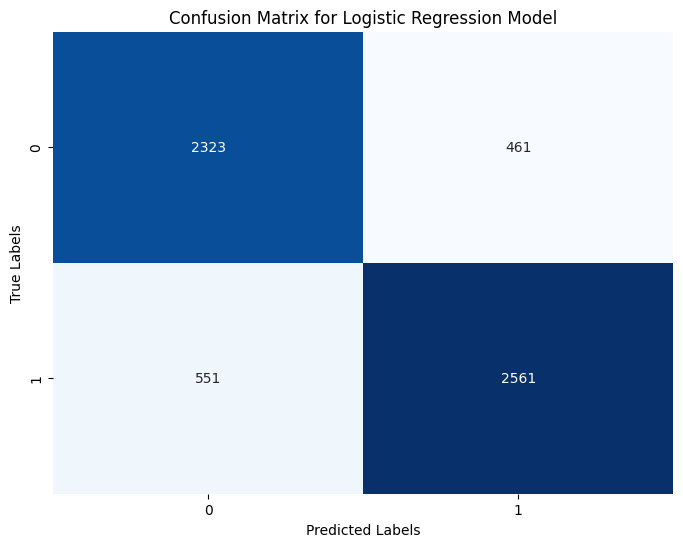

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

In [60]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 9.2 MB/s eta 0:00:00


In [ ]:

from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

catboost_model = CatBoostClassifier(verbose=False)
catboost_model.fit(X_train_scaled, y_train)

catboost_predictions = catboost_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, catboost_predictions)
print("CatBoost Accuracy:", accuracy)

CatBoost Accuracy: 0.9011764705882352


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 1. Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# 2. Make predictions on the testing set for Decision Tree
dt_predictions = dt_model.predict(X_test_scaled)

# 3. Evaluate the Decision Tree model's performance
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)
print("\nDecision Tree Classification Report:\n", classification_report(y_test, dt_predictions))


Decision Tree Accuracy: 0.9245588235294118

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.88      0.92      3331
           1       0.89      0.97      0.93      3469

    accuracy                           0.92      6800
   macro avg       0.93      0.92      0.92      6800
weighted avg       0.93      0.92      0.92      6800



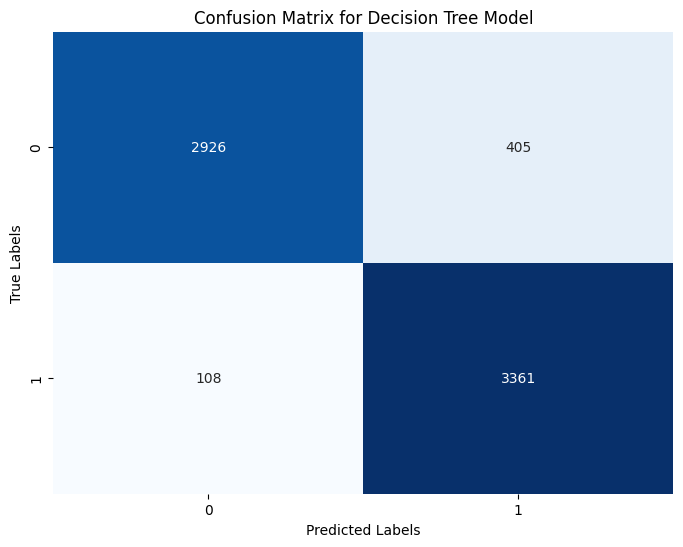

In [ ]:
# Calculate confusion matrix
conf_matrix_dt = confusion_matrix(y_test, dt_predictions)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

# Initialize base estimators
catboost_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, loss_function='Logloss')
decision_tree_model = DecisionTreeClassifier()

# Initialize Random Forest ensemble with both base estimators
rf_ensemble = RandomForestClassifier(n_estimators=100, random_state=42)
rf_ensemble.fit(X_train_scaled, y_train)

# Make predictions using the ensemble
ensemble_predictions = rf_ensemble.predict(X_test_scaled)

# Evaluate the ensemble's performance
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble Accuracy:", ensemble_accuracy)

from sklearn.metrics import classification_report

# Make predictions using the ensemble
ensemble_predictions = rf_ensemble.predict(X_test_scaled)

# Generate classification report
classification_report_ensemble = classification_report(y_test, ensemble_predictions)

# Print the classification report
print("Classification Report for Ensemble Model:")
print(classification_report_ensemble)


Ensemble Accuracy: 0.94
Classification Report for Ensemble Model:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      3331
           1       0.91      0.98      0.94      3469

    accuracy                           0.94      6800
   macro avg       0.94      0.94      0.94      6800
weighted avg       0.94      0.94      0.94      6800



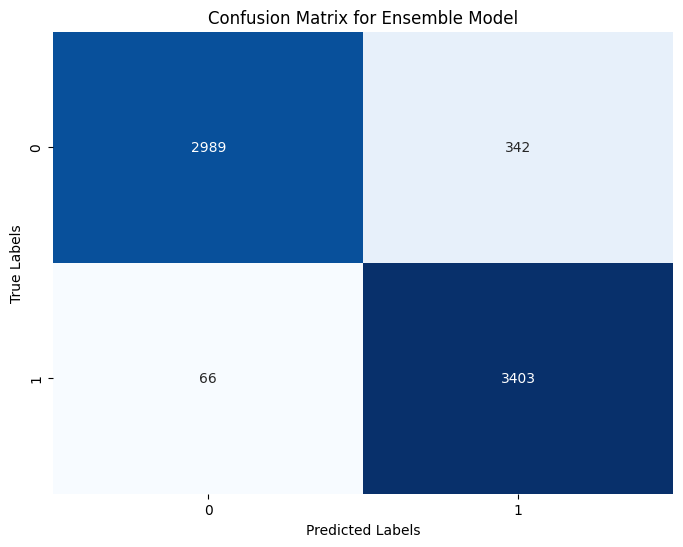

In [ ]:
# Calculate confusion matrix for ensemble predictions
conf_matrix_ensemble = confusion_matrix(y_test, ensemble_predictions)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ensemble, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Ensemble Model')
plt.show()

In [ ]:
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict_proba(X_train)[:, 1]
xgb_pred_test = xgb_model.predict_proba(X_test)[:, 1]

In [ ]:
ann_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
ann_model.fit(X_train_scaled, y_train)

ann_pred= ann_model.predict(X_train_scaled)
ann_pred_test = ann_model.predict(X_test_scaled)

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train_scaled, y_train)

knn_pred = knn_model.predict(X_train_scaled)
knn_pred_test = knn_model.predict(X_test_scaled)

In [ ]:
combined_train = np.column_stack((xgb_pred, ann_pred, knn_pred))
combined_test = np.column_stack((xgb_pred_test, ann_pred_test, knn_pred_test))

In [ ]:
model_dt = DecisionTreeClassifier()
model_dt.fit(combined_train, y_train)

DecisionTreeClassifier()

In [ ]:
stacked_test = model_dt.predict(combined_test)

accuracy = accuracy_score(y_test, stacked_test)
print("Stacked Model Accuracy:", accuracy)

stacked_classification_report= classification_report(y_test, stacked_test)
print("Classification Report for Stacked Model:")
print(stacked_classification_report)

Stacked Model Accuracy: 0.9411764705882353
Classification Report for Stacked Model:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      3331
           1       0.91      0.98      0.94      3469

    accuracy                           0.94      6800
   macro avg       0.94      0.94      0.94      6800
weighted avg       0.94      0.94      0.94      6800



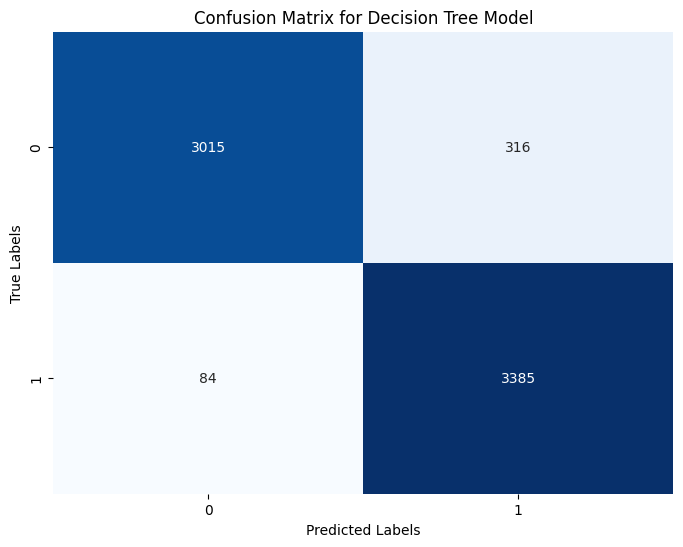

In [ ]:
conf_matrix_stacked = confusion_matrix(y_test, stacked_test)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_stacked, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()

In [ ]:
catboost_pred = catboost_model.predict_proba(X_train)[:, 1]
catboost_pred_test = catboost_model.predict_proba(X_test)[:, 1]

In [ ]:
combined_train_boost = np.column_stack((catboost_pred, xgb_pred))
combined_test_boost = np.column_stack((catboost_pred_test, xgb_pred_test))

In [ ]:
annmodel_boost = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
annmodel_boost.fit(combined_train_boost, y_train)

MLPClassifier(max_iter=500)

In [ ]:
combined_boosting = annmodel_boost.predict(combined_test_boost)

accuracy = accuracy_score(y_test, combined_boosting)
print("Boosted Model Accuracy with ANN:", accuracy)

combined_classification_report= classification_report(y_test, combined_boosting)
print("Classification Report for Model using 2 Boosting Algorithms with ANN:")
print(combined_classification_report)

Boosted Model Accuracy with ANN: 0.9120588235294118
Classification Report for Model using 2 Boosting Algorithms with ANN:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      3331
           1       0.89      0.94      0.92      3469

    accuracy                           0.91      6800
   macro avg       0.91      0.91      0.91      6800
weighted avg       0.91      0.91      0.91      6800



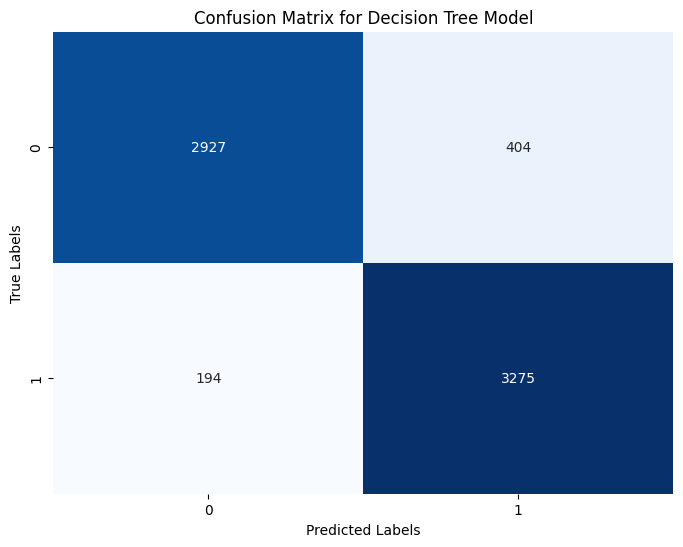

In [ ]:
conf_matrix_ann = confusion_matrix(y_test, combined_boosting)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ann, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()

In [ ]:
knnmodel_boost = KNeighborsClassifier(n_neighbors=4)
knnmodel_boost.fit(combined_train_boost, y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
combined_boosting_knn = knnmodel_boost.predict(combined_test_boost)

accuracy = accuracy_score(y_test, combined_boosting_knn)
print("Boosted Model Accuracy with KNN:", accuracy)

combined_classification_report= classification_report(y_test, combined_boosting_knn)
print("Classification Report for Model using 2 Boosting Algorithms with KNN:")
print(combined_classification_report)

Boosted Model Accuracy with KNN: 0.9166176470588235
Classification Report for Model using 2 Boosting Algorithms with KNN:
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      3331
           1       0.91      0.93      0.92      3469

    accuracy                           0.92      6800
   macro avg       0.92      0.92      0.92      6800
weighted avg       0.92      0.92      0.92      6800



In [ ]:
rf_boost = RandomForestClassifier(n_estimators=100, random_state=42)
rf_boost.fit(combined_train_boost, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
combined_boosting_rf = rf_boost.predict(combined_test_boost)

accuracy = accuracy_score(y_test, combined_boosting_rf)
print("Boosting Model Accuracy with Random Forest:", accuracy)

combined_classification_report_rf= classification_report(y_test, combined_boosting_rf)
print("Classification Report for Model using 2 Boosting Algorithms with Random Forest:")
print(combined_classification_report_rf)

Boosting Model Accuracy with Random Forest: 0.9436764705882353
Classification Report for Model using 2 Boosting Algorithms with Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      3331
           1       0.91      0.98      0.95      3469

    accuracy                           0.94      6800
   macro avg       0.95      0.94      0.94      6800
weighted avg       0.95      0.94      0.94      6800

